In [27]:
import pystan
import stan_utility
import matplotlib
import matplotlib.pyplot as plot
# https://github.com/millejoh/emacs-ipython-notebook/issues/41
matplotlib.rcParams["figure.facecolor"] = "white"
matplotlib.rcParams["axes.facecolor"] = "white"
matplotlib.rcParams["savefig.facecolor"] = "white"
import numpy

In [28]:
light = "#DCBCBC"
light_highlight = "#C79999"
mid = "#B97C7C"
mid_highlight = "#A25050"
dark = "#8F2727"
dark_highlight = "#7C0000"
green = "#00FF00"

In [29]:
############################################################
# Create data
############################################################

model = stan_utility.compile_model('generate_data.stan')
fit = model.sampling(seed=194838, algorithm='Fixed_param', iter=1, chains=1)

data = dict(N = 25, M = 3,
            X = fit.extract()['X'][0,:], y = fit.extract()['y'][0,:])

pystan.stan_rdump(data, 'linear_regression.data.R')

Using cached StanModel


In [30]:
data = pystan.read_rdump('linear_regression.data.R')
data

OrderedDict([('N', array(25)),
             ('M', array(3)),
             ('X',
              array([[  8.76971671e-01,   2.10933161e-01,  -2.36249138e-02,
                       -5.80420103e-01,   9.98429947e-01,  -7.85132724e-01,
                       -8.66940421e-01,   2.25422029e-01,  -3.84545671e-01,
                       -7.13138739e-01,   5.94300079e-01,   1.06636311e-01,
                        8.48867587e-01,  -2.39336554e-01,   5.44128090e-01,
                       -2.48042348e-01,  -4.72529862e-01,   2.20523753e-01,
                       -4.88561916e-01,   3.08761859e-01,  -3.44482774e-01,
                        7.03950189e-02,   9.30617099e-01,  -6.69193227e-01,
                        3.20965207e-01],
                     [  7.69079312e-01,   4.44927984e-02,   5.58136551e-04,
                        3.36887496e-01,   9.96862360e-01,   6.16433394e-01,
                        7.51585694e-01,   5.08150912e-02,   1.47875373e-01,
                        5.08566861e-01,   3

Using cached StanModel
n_eff / iter looks reasonable for all parameters
Rhat looks reasonable for all parameters
0.0 of 4000 iterations ended with a divergence (0.0%)
0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


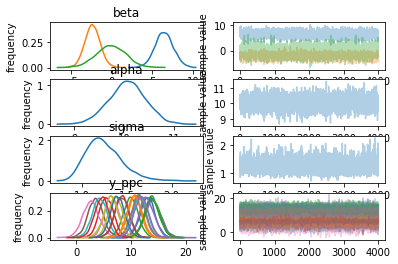

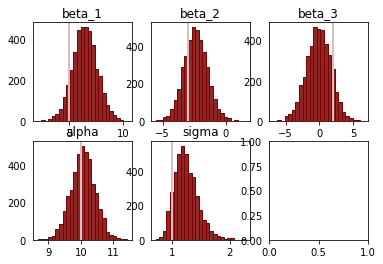

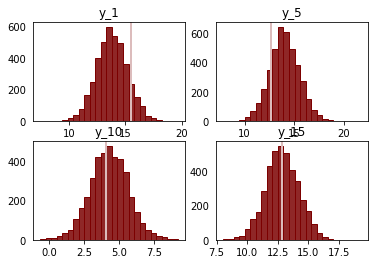

In [31]:
############################################################
# Fit initial Stan program
############################################################

model = stan_utility.compile_model('linear_regression1.stan')
fit = model.sampling(data=data, seed=4938483)

# Check diagnostics one by one
# stan_utility.check_n_eff(fit)
# stan_utility.check_rhat(fit)
# stan_utility.check_div(fit)
# stan_utility.check_treedepth(fit)
# stan_utility.check_energy(fit)

# Or all at once
stan_utility.check_all_diagnostics(fit)

# Default visual summaries
fit.plot()
plot.show()
params = fit.extract()

# Plot marginal posteriors
f, axarr = plot.subplots(2, 3)
for a in axarr[0,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')
for a in axarr[1,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')

axarr[0, 0].set_title("beta_1")
axarr[0, 0].hist(params['beta'][:,0], bins = 25, color = dark, ec = dark_highlight)
axarr[0, 0].axvline(x=5, linewidth=2, color=light)

axarr[0, 1].set_title("beta_2")
axarr[0, 1].hist(params['beta'][:,1], bins = 25, color = dark, ec = dark_highlight)
axarr[0, 1].axvline(x=-3, linewidth=2, color=light)

axarr[0, 2].set_title("beta_3")
axarr[0, 2].hist(params['beta'][:,2], bins = 25, color = dark, ec = dark_highlight)
axarr[0, 2].axvline(x=2, linewidth=2, color=light)

axarr[1, 0].set_title("alpha")
axarr[1, 0].hist(params['alpha'], bins = 25, color = dark, ec = dark_highlight)
axarr[1, 0].axvline(x=10, linewidth=2, color=light)

axarr[1, 1].set_title("sigma")
axarr[1, 1].hist(params['sigma'], bins = 25, color = dark, ec = dark_highlight)
axarr[1, 1].axvline(x=1, linewidth=2, color=light)

plot.show()

# Perform a posterior predictive check by plotting
# posterior predictive distributions against data
f, axarr = plot.subplots(2, 2)
for a in axarr[0,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')
for a in axarr[1,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')

axarr[0, 0].set_title("y_1")
axarr[0, 0].hist(params['y_ppc'][:,0], bins = 25, color = dark, ec = dark_highlight)
axarr[0, 0].axvline(x=data['y'][0], linewidth=2, color=light)

axarr[0, 1].set_title("y_5")
axarr[0, 1].hist(params['y_ppc'][:,4], bins = 25, color = dark, ec = dark_highlight)
axarr[0, 1].axvline(x=data['y'][4], linewidth=2, color=light)

axarr[1, 0].set_title("y_10")
axarr[1, 0].hist(params['y_ppc'][:,9], bins = 25, color = dark, ec = dark_highlight)
axarr[1, 0].axvline(x=data['y'][9], linewidth=2, color=light)

axarr[1, 1].set_title("y_15")
axarr[1, 1].hist(params['y_ppc'][:,14], bins = 25, color = dark, ec = dark_highlight)
axarr[1, 1].axvline(x=data['y'][14], linewidth=2, color=light)

plot.show()

Using cached StanModel
n_eff / iter looks reasonable for all parameters
Rhat looks reasonable for all parameters
0.0 of 4000 iterations ended with a divergence (0.0%)
0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


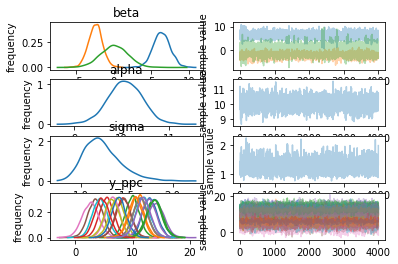

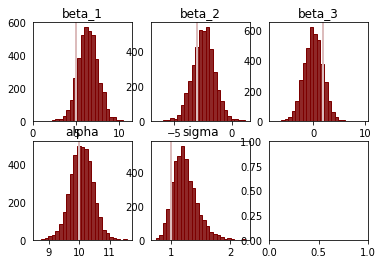

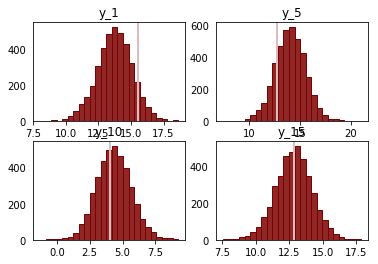

In [32]:
############################################################
# Fit with vectorized Stan program
############################################################

model = stan_utility.compile_model('linear_regression2.stan')
fit = model.sampling(data=data, seed=4938483)

# Check diagnostics
stan_utility.check_all_diagnostics(fit)

# Default visual summaries
fit.plot()
plot.show()
params = fit.extract()

# Plot marginal posteriors
f, axarr = plot.subplots(2, 3)
for a in axarr[0,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')
for a in axarr[1,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')

axarr[0, 0].set_title("beta_1")
axarr[0, 0].hist(params['beta'][:,0], bins = 25, color = dark, ec = dark_highlight)
axarr[0, 0].axvline(x=5, linewidth=2, color=light)

axarr[0, 1].set_title("beta_2")
axarr[0, 1].hist(params['beta'][:,1], bins = 25, color = dark, ec = dark_highlight)
axarr[0, 1].axvline(x=-3, linewidth=2, color=light)

axarr[0, 2].set_title("beta_3")
axarr[0, 2].hist(params['beta'][:,2], bins = 25, color = dark, ec = dark_highlight)
axarr[0, 2].axvline(x=2, linewidth=2, color=light)

axarr[1, 0].set_title("alpha")
axarr[1, 0].hist(params['alpha'], bins = 25, color = dark, ec = dark_highlight)
axarr[1, 0].axvline(x=10, linewidth=2, color=light)

axarr[1, 1].set_title("sigma")
axarr[1, 1].hist(params['sigma'], bins = 25, color = dark, ec = dark_highlight)
axarr[1, 1].axvline(x=1, linewidth=2, color=light)

plot.show()

# Perform a posterior predictive check by plotting
# posterior predictive distributions against data
f, axarr = plot.subplots(2, 2)
for a in axarr[0,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')
for a in axarr[1,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')

axarr[0, 0].set_title("y_1")
axarr[0, 0].hist(params['y_ppc'][:,0], bins = 25, color = dark, ec = dark_highlight)
axarr[0, 0].axvline(x=data['y'][0], linewidth=2, color=light)

axarr[0, 1].set_title("y_5")
axarr[0, 1].hist(params['y_ppc'][:,4], bins = 25, color = dark, ec = dark_highlight)
axarr[0, 1].axvline(x=data['y'][4], linewidth=2, color=light)

axarr[1, 0].set_title("y_10")
axarr[1, 0].hist(params['y_ppc'][:,9], bins = 25, color = dark, ec = dark_highlight)
axarr[1, 0].axvline(x=data['y'][9], linewidth=2, color=light)

axarr[1, 1].set_title("y_15")
axarr[1, 1].hist(params['y_ppc'][:,14], bins = 25, color = dark, ec = dark_highlight)
axarr[1, 1].axvline(x=data['y'][14], linewidth=2, color=light)

plot.show()